<a href="https://colab.research.google.com/github/LahiruSanjana/ML-AI-development/blob/main/Cat_and_Dog_image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time
import opendatasets as od

In [ ]:
od.download("https://www.kaggle.com/datasets/dineshpiyasamara/cats-and-dogs-for-classification")

Skipping, found downloaded files in "./cats-and-dogs-for-classification" (use force=True to force download)


In [ ]:
BATCH_SIZE=32
IMAGE_SIZE=(128,128)

In [ ]:
train_data_dir="/content/cats-and-dogs-for-classification/cats_dogs/train"
test_data_dir="/content/cats-and-dogs-for-classification/cats_dogs/test"



In [ ]:
train_data=tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                       batch_size=BATCH_SIZE,
                                                       image_size=IMAGE_SIZE,
                                                       subset='training',
                                                       validation_split=0.1,
                                                       seed=42)
validation_data=tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                       batch_size=BATCH_SIZE,
                                                       image_size=IMAGE_SIZE,
                                                            subset='validation',
                                                            validation_split=0.1,
                                                            seed=42)

Found 8000 files belonging to 2 classes.
Using 7200 files for training.
Found 8000 files belonging to 2 classes.
Using 800 files for validation.


In [ ]:
test_data=tf.keras.utils.image_dataset_from_directory(test_data_dir,
                                                      batch_size=BATCH_SIZE,
                                                      image_size=IMAGE_SIZE,
                                                      shuffle=True)

Found 2000 files belonging to 2 classes.


In [ ]:
train_data=train_data.map(lambda x,y:(x/255,y))
validation_data=validation_data.map(lambda x,y:(x/255,y))
test_data=test_data.map(lambda x,y:(x/255,y))

In [ ]:
for image,label in train_data.take(1):
  for i in range(1):
    print(image)

tf.Tensor(
[[[[5.20978391e-01 4.89605844e-01 4.15096015e-01]
   [5.44387162e-01 5.13014615e-01 4.27843034e-01]
   [5.40604413e-01 5.10273516e-01 4.16952461e-01]
   ...
   [5.44198096e-01 4.65766698e-01 3.59884351e-01]
   [5.58051825e-01 4.79620486e-01 3.73738140e-01]
   [5.35692394e-01 4.69025731e-01 3.63343477e-01]]

  [[5.32297432e-01 4.89160150e-01 4.18571919e-01]
   [5.36231875e-01 4.93094653e-01 4.11844641e-01]
   [6.01839185e-01 5.59743583e-01 4.70344096e-01]
   ...
   [5.49420774e-01 4.70989406e-01 3.65107030e-01]
   [6.28687024e-01 5.50255656e-01 4.44373280e-01]
   [6.32254779e-01 5.61666548e-01 4.78762150e-01]]

  [[5.43321550e-01 4.92341161e-01 4.25674498e-01]
   [5.56708097e-01 5.07137060e-01 4.28399295e-01]
   [5.15878737e-01 4.68819886e-01 3.80462050e-01]
   ...
   [4.89806414e-01 4.11375046e-01 3.05492699e-01]
   [4.92558032e-01 4.14126635e-01 3.08244288e-01]
   [4.46170330e-01 3.71660531e-01 3.04993868e-01]]

  ...

  [[6.51286304e-01 6.07383072e-01 5.19576728e-01]
   [6

In [ ]:
data_augmention=tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal",input_shape=(128,128,3)),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model=tf.keras.models.Sequential()

model.add(data_augmention)

model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(32,activation='relu'))

model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,325,825 (12.69 MB)

 Trainable params: 3,325,569 (12.69 MB)

 Non-trainable params: 256 (1.00 KB)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [72]:
start_time=time.time()
history=model.fit(train_data,
          epochs=64,
          validation_data=validation_data)
end_time=time.time()

Epoch 1/64
225/225 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.6214 - loss: 0.6544 - val_accuracy: 0.6162 - val_loss: 0.6492
Epoch 2/64
225/225 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - accuracy: 0.6600 - loss: 0.6242 - val_accuracy: 0.6875 - val_loss: 0.5773
Epoch 3/64
225/225 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.6698 - loss: 0.6071 - val_accuracy: 0.5775 - val_loss: 0.7732
Epoch 4/64
225/225 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.6804 - loss: 0.5878 - val_accuracy: 0.7325 - val_loss: 0.5296
Epoch 5/64
225/225 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.6862 - loss: 0.5708 - val_accuracy: 0.6787 - val_loss: 0.5696
Epoch 6/64
225/225 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.7127 - loss: 0.5556 - val_accuracy: 0.7638 - val_loss: 0.4942
Epoch 7/64
225/225 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.7162 - loss: 0.5407 - val_accuracy: 0.7675 - val_loss: 0.5215
Epoch 8/64
225/225 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.7355 - loss: 0.5286 - val_acc

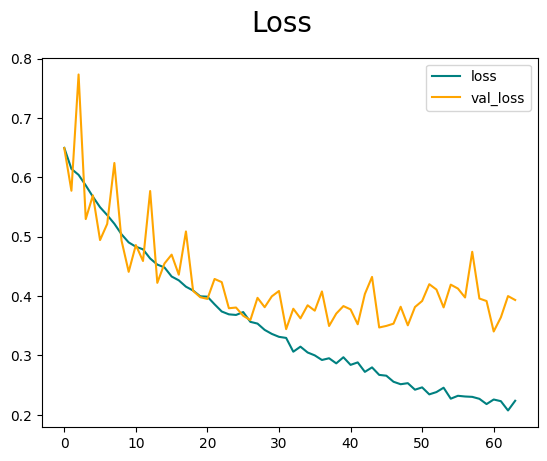

In [73]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend()
plt.show()

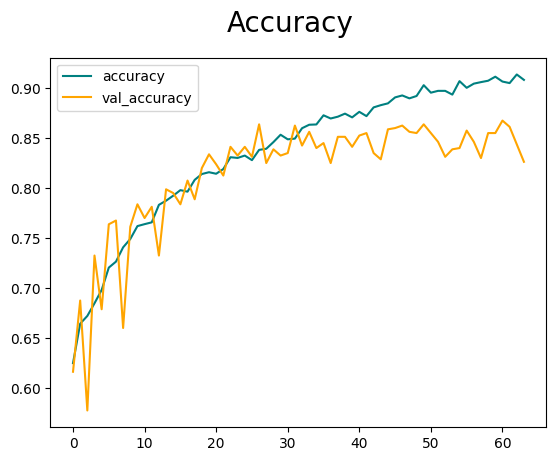

In [74]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend()
plt.show()


In [75]:
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
accuracy = tf.keras.metrics.BinaryAccuracy()

In [76]:
for batch in test_data.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━

In [77]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.8515241146087646>

In [78]:
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.8659999966621399>

In [79]:
accuracy.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.8575000166893005>

In [80]:
!pip install opencv-python -q

In [87]:
import cv2

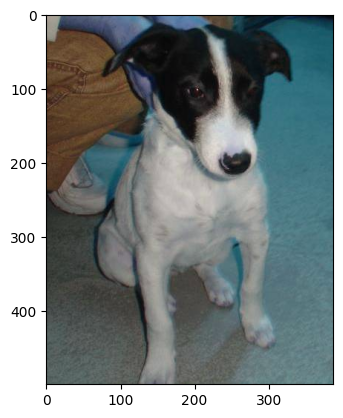

In [119]:
img = cv2.imread('/content/cats-and-dogs-for-classification/cats_dogs/test/dogs/dog.4022.jpg')
plt.imshow(img)
plt.show()

In [120]:
resized_image = tf.image.resize(img, IMAGE_SIZE)
scaled_image = resized_image/255

In [121]:
yhat = model.predict(np.expand_dims(scaled_image, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


In [122]:
yhat

array([[0.81159973]], dtype=float32)

In [123]:
class_names = ['cats', 'dogs']
print(class_names)

['cats', 'dogs']


In [124]:
if yhat < 0.5:
  print("CAT")
else:
  print("DOG")


DOG
